In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#Α.Διαβάζει στη μεταβλητή img1 μια εικόνα σαν ασπρόμαυρη και εμφανίζει την εικόνα και τη διάστασή της (μήκος και πλάτος σε pixels)
img1 = cv2.imread('img_disney.jpeg', 0)

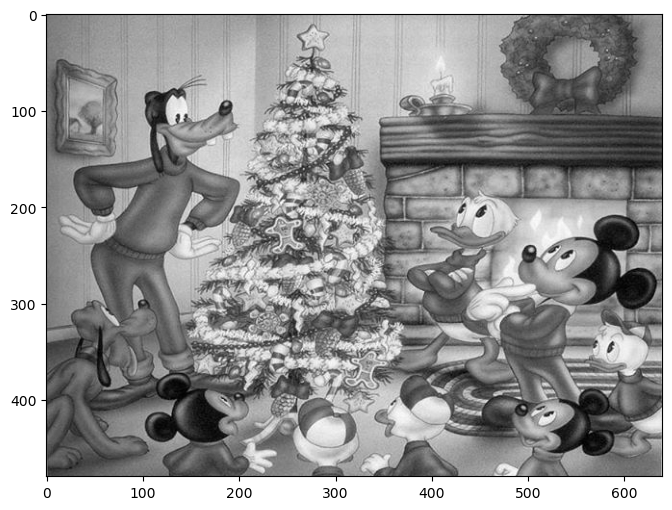

In [3]:
plt.figure(figsize=(12,6))
plt.imshow(img1, cmap = 'gray')
plt.show()

In [4]:
#B.Εφαρμόζει στην εικόνα 2D Convolution με τον kenrel που δόθηκε στην εκφώνηση και εμφανίζει την αρχική εικόνα και δίπλα της την εικόνα που προκύπτει ως αποτέλεσμα.
kernel = np.array([[0, -1, 0], [-1, 3, -1], [0, -1, 0]], dtype = np.float32)

In [5]:
#Εμφάνιση kernel
kernel

array([[ 0., -1.,  0.],
       [-1.,  3., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [6]:
#Εφαρμογή kernel στην εικόνα (img1)
img2 = cv2.filter2D(img1, -1,  kernel)

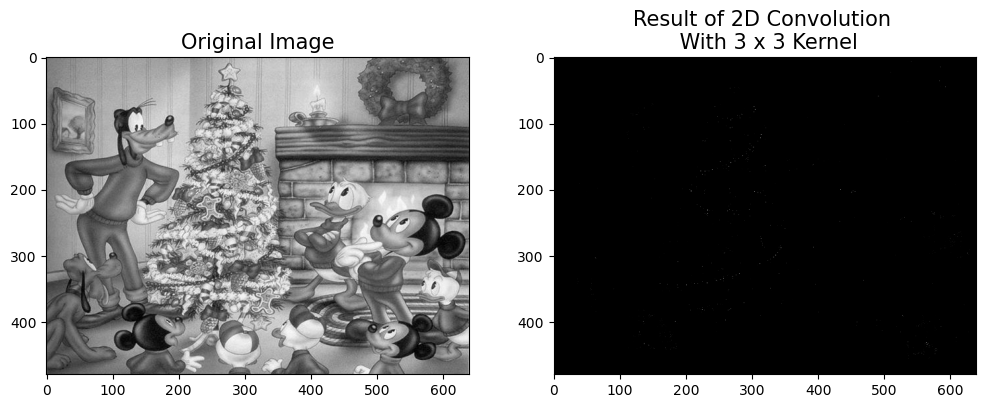

In [7]:
#Εμφάνιση της αρχικής εικόνας και το αποτέλεσμα της με τη χρήση 2D convolution με 3x3 kernel
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img1, cmap = 'gray')
plt.title("Original Image", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(img2, cmap = 'gray')
plt.title("Result of 2D Convolution \n With 3 x 3 Kernel", fontsize = 15)
plt.show()

In [8]:
#Γ.Εφαρμόζει στην εικόνα mean filtering με kernel 5X5 και εμφανίζει την αρχική εικόνα και δίπλα την εικόνα-αποτέλεσμα.
img_mean = cv2.blur(img1, ksize = (5,5))

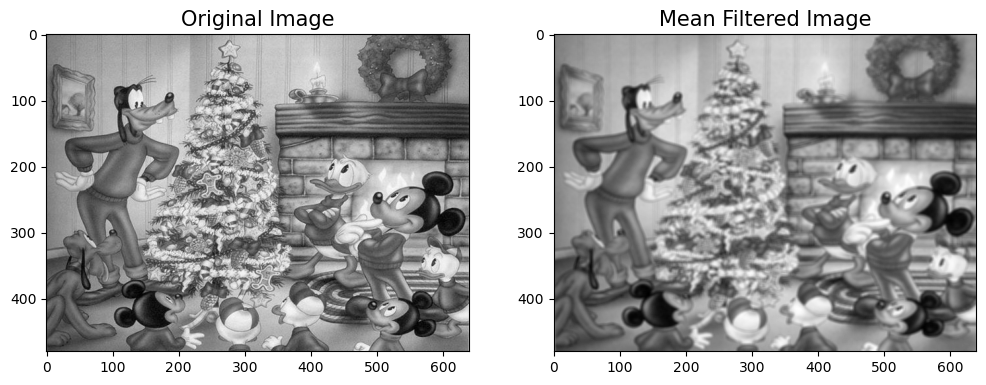

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img1, cmap = 'gray')
plt.title("Original Image", fontsize = 15)
plt.subplot(1,2,2)
plt.imshow(img_mean, cmap = 'gray')
plt.title("Mean Filtered Image", fontsize = 15)
plt.show()

In [10]:
#Δ.Εισάγει στην εικόνα τυχαίο θόρυβο και εφαρμόζει bluring (mean filter) με kernel 5x5 για να αφαιρέσει το θόρυβο. 
#Εμφανίζει την αρχική εικόνα, την εικόνα με θόρυβο και το αποτέλεσμα εφαρμογής του φίλτρου blur.
# Ορίζουμε έναν πινακα με μηδενικά μεγέθους όσο και η εικόνα μας img1.
matrix = np.zeros(img1.shape, np.uint8)

In [11]:
matrix.shape

(480, 640)

In [12]:
# Γεμίζουμε τον matrix με θόρυβο και αποθηκεύουμε το αποτέλεσμα στον noise.
noise = cv2.randn(matrix, mean = 0, stddev = 15)

In [13]:
# Ο noise θα έχει μέγεθος 480x640 , όσο ο matrix, και θα είναι γεμάτος με τυχαίες τιμές 
noise

array([[ 0,  2,  0, ...,  9,  0,  0],
       [ 0, 13,  0, ...,  0,  0,  0],
       [ 7,  0,  0, ...,  8,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5, 15,  0],
       [15,  0,  0, ...,  3,  0,  5],
       [ 5, 18,  0, ...,  4, 16,  0]], dtype=uint8)

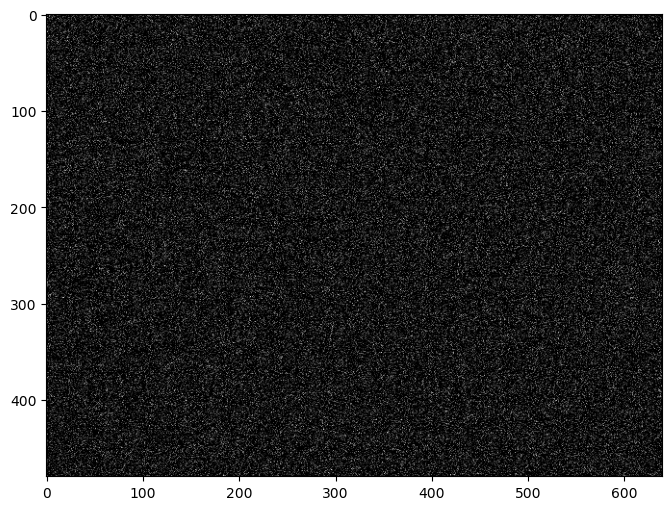

In [14]:
# Εμφανίζουμε τον Noise 
plt.figure(figsize=(12,6))
plt.imshow(noise, cmap = 'gray')
plt.show()

In [15]:
# Προσθέτουμε τον θόρυβο στην εικόνα μας img1 με απλή πρόσθεση με την εικόνα - θόρυβο noise.
Noisy_img = cv2.add(img1, noise)

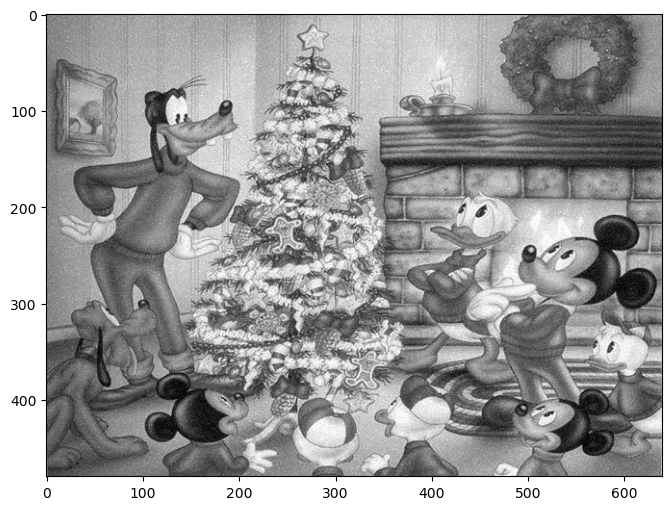

In [16]:
plt.figure(figsize=(12,6))
plt.imshow(Noisy_img, cmap = 'gray')
plt.show()

In [17]:
#Έπειτα χρησιμοποιούμε τον Mean Filter μέσω της cv2.blur για να αφαιρέσουμε τον θόρυβο που εισάγαμε στην εικόνα.
meanfiltered_Image = cv2.blur(Noisy_img, ksize = (5,5))

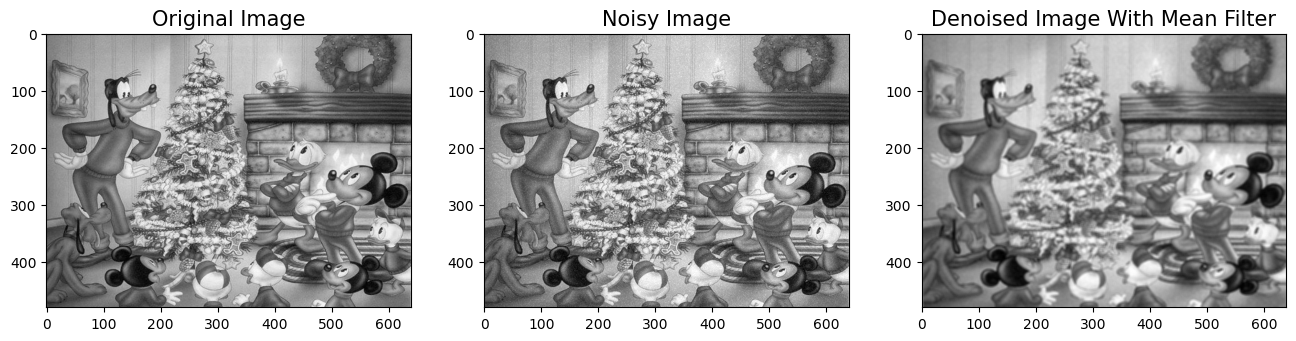

In [18]:
#Θα δούμε ότι ο θόρυβος θα αφαιρεθεί αλλά θα έχουμε και blurring της εικόνας
plt.figure(figsize=(16,9))
plt.subplot(1,3,1)
plt.imshow(img1, cmap = 'gray')
plt.title("Original Image", fontsize = 15)
plt.subplot(1,3,2)
plt.imshow(Noisy_img, cmap = 'gray')
plt.title("Noisy Image", fontsize = 15)
plt.subplot(1,3,3)
plt.imshow(meanfiltered_Image, cmap = 'gray')
plt.title("Denoised Image With Mean Filter", fontsize = 15)
plt.show()